# Sales Analysis

In [1]:
import pandas as pd
import os
import numpy as np

## Merge the 12 months of sales data into a single CSV file 

In [2]:
df=pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files=[file for file in os.listdir('./Sales_Data')]

all_months_data=pd.DataFrame()

for i in files:
    df=pd.read_csv('./Sales_Data/'+i)
    all_months_data=pd.concat([all_months_data,df])
    
    
   

In [3]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Question 1: What was the best month for sales? How much was earned that month?


### -: First removing all the null value from the dataframe

In [4]:
all_months_data.dropna(inplace=True,how='all')

In [5]:
all_months_data.describe()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### -: Augument data with additional column + Data Cleaning


In [6]:
all_months_data['Month']=all_months_data['Order Date'].str[0:2]

In [7]:
all_months_data['Order Date'].replace({'Order Date':np.NaN},inplace=True)
                

In [8]:
all_months_data.dropna(inplace=True)

In [9]:
all_months_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [10]:
all_months_data['Month']=all_months_data['Month'].astype('int32')

In [11]:
a=all_months_data[all_months_data['Month']==1][['Quantity Ordered','Price Each']]

### :- Converting the type of some columns 

In [12]:
a['Quantity Ordered']=a['Quantity Ordered'].astype('int32')

In [13]:
a['Price Each']=a['Price Each'].astype('float32')

In [14]:
a['Sum']=a['Quantity Ordered']*a['Price Each']

In [15]:
maxm=a['Sum'].sum()

In [16]:
maxm=0
ma=0
mon=0
for i in range(1,13):
    a=all_months_data[all_months_data['Month']==i][['Quantity Ordered','Price Each']]
    a['Quantity Ordered']=a['Quantity Ordered'].astype('int32')
    a['Price Each']=a['Price Each'].astype('float32')
    a['Sum']=a['Quantity Ordered']*a['Price Each']

    ma=a['Sum'].sum()
    if ma>maxm:
        maxm=ma
        mon=i
        
    else:
        pass
    
    
print('The best Month in Sales is {}'.format(mon))
print('Sales : {}'.format(maxm))
        

The best Month in Sales is 12
Sales : 4613443.5


## Or we can do it with .groupby()

### Converting required columns to integer type for multiplication 

In [17]:
all_months_data['Quantity Ordered']=pd.to_numeric(all_months_data['Quantity Ordered'])

In [18]:
all_months_data['Price Each']=pd.to_numeric(all_months_data['Price Each'])

### Adding a new column Sales to the dataframe

In [19]:
all_months_data['Sales']=all_months_data['Quantity Ordered']*all_months_data['Price Each']

In [20]:
all_months_data.groupby('Month').sum()['Sales'].max()

4613443.340001534

In [21]:
results=all_months_data.groupby('Month').sum()

In [22]:
results['Sales']

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [23]:
all_months_data.reset_index(drop=True,inplace=True)

### Check out the graphical representation of the sales w.r.t months

In [24]:
import matplotlib.pyplot as plt



Text(0.5, 1.0, 'Months vs Sales')

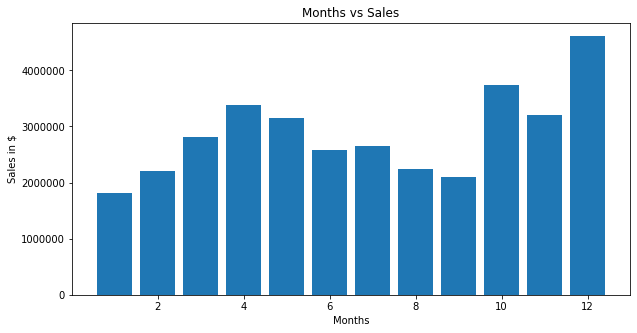

In [25]:
months=range(1,13)
plt.figure(figsize=(10,5))
plt.bar(months, results['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales in $')
plt.title('Months vs Sales')

### Conclusion :

#### The month 'December' has the highest sales. The reason might be Christmas and New Year

## Question 2: What city has the highest number in sales?


In [26]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### To achieve this we have add a new column 'City' to the dataframe

In [27]:
all_months_data['City']=all_months_data['Purchase Address'].apply(lambda x : x.split(',')[1].strip() + ' ' + x.split(' ')[-2].strip())

In [28]:
all_months_data['City']

0                Dallas TX
1                Boston MA
2           Los Angeles CA
3           Los Angeles CA
4           Los Angeles CA
                ...       
185945      Los Angeles CA
185946    San Francisco CA
185947    San Francisco CA
185948    San Francisco CA
185949    San Francisco CA
Name: City, Length: 185950, dtype: object

In [29]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [30]:
all_months_data.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


In [31]:
results=all_months_data.groupby('City').sum()

### Let's look into the Graphical Representation of the above conclusion

Text(0.5, 1.0, 'City vs Sales')

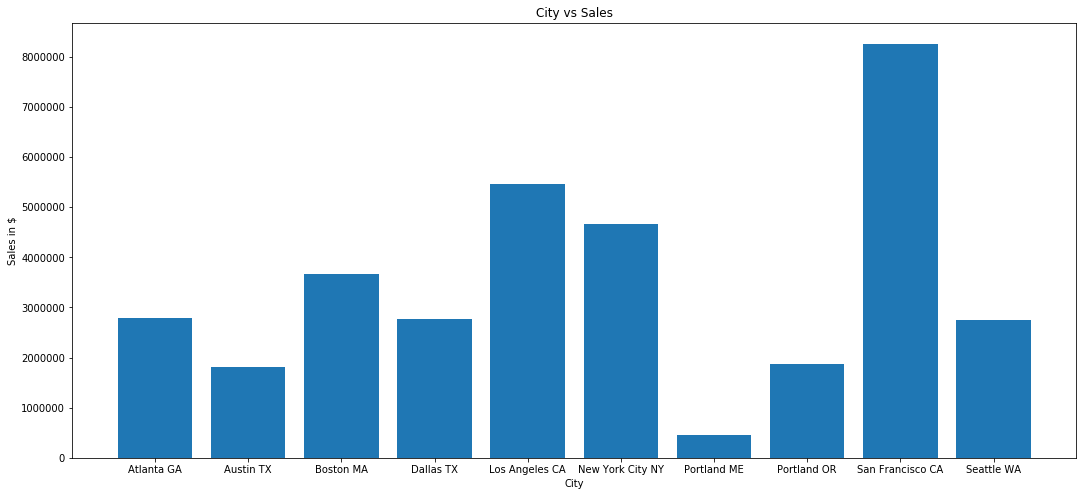

In [32]:
plt.figure(figsize=(18,8))
plt.bar(results.index,results['Sales'])
plt.xlabel('City')
plt.ylabel('Sales in $')
plt.title('City vs Sales')


### Conclusion :

#### San Francisco CA city has the highest sales. 

# Question 3: 
  ## What time should we display advertisement to maximize likelihood of customer's buying product?

In [33]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### First we have to create a new column for keeping the records of hours of sales.

In [34]:
all_months_data['Order Date']=pd.to_datetime(all_months_data['Order Date'])

In [35]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [36]:
all_months_data['Hour']=all_months_data['Order Date'].dt.hour
all_months_data['Minutes']=all_months_data['Order Date'].dt.minute

In [37]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [38]:
all_months_data.groupby('Hour').sum()['Sales']

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

In [39]:
results=all_months_data.groupby('Hour').sum()

### Let's plot the graph of the above conclusion 

Text(0, 0.5, 'Sales in $')

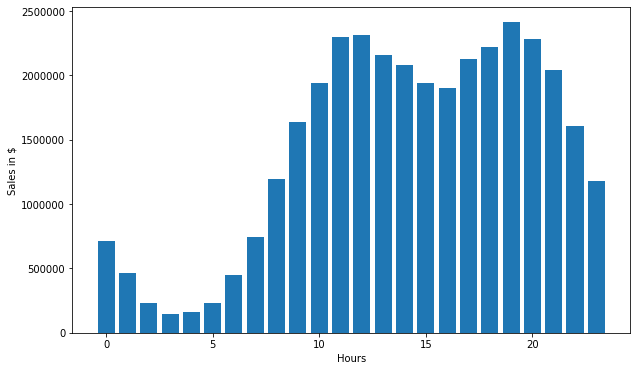

In [40]:
hours=range(0,24)
plt.figure(figsize=(10,6))
plt.bar(hours,results['Sales'])
plt.xlabel('Hours')
plt.ylabel('Sales in $')

Text(0, 0.5, 'Sales in $')

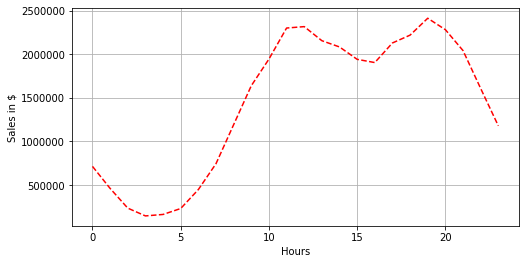

In [41]:
plt.figure(figsize=(8,4))
plt.plot(hours,results['Sales'],'r--')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sales in $')

### Conclusion :

#### We should advertise before 8p.m. to get the maximize to chances increased sales.

# Question 3 : What products are most often sold together?

In [42]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [43]:
all_months_data['Date']=all_months_data['Order Date'].dt.date

In [44]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Date
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,2019-04-19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,2019-04-07
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,2019-04-12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,2019-04-12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,2019-04-30


In [45]:
df=all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

In [46]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

C:\Users\Bharat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df=df[['Order ID','Grouped']].drop_duplicates()

In [48]:
df.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [49]:
from itertools import combinations
from collections import Counter


count=Counter()
for sublist in df['Grouped']:
    sublist=sublist.split(',')
    count.update(Counter(combinations(sublist,2)))
    
    
for key , value in (count.most_common(10)):
    print(key , value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Question 4: What product sold the most? Why do you think it sold the most?

In [50]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes,Date
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,2019-04-19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,2019-04-07
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,2019-04-12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,2019-04-12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,2019-04-30


In [64]:
prod=all_months_data.groupby('Product')

In [65]:
quantity_ordered=prod.sum()['Quantity Ordered']

In [67]:
prod_lst=[i for i,df in prod]

### Let's plot the information that we have got from the dataframe.

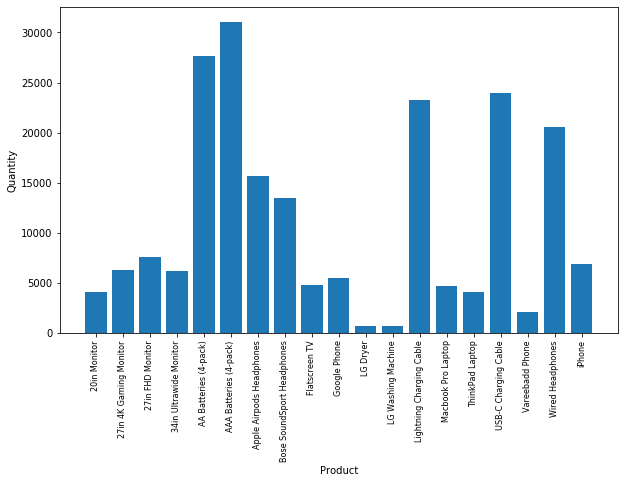

In [81]:
plt.figure(figsize=(10,6))

plt.bar(prod_lst,quantity_ordered)
plt.xticks(prod_lst,rotation='vertical',size=8)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()

### From the above plot we can conclude that 'AAA batteries' are the most sold item.

### And for the answer of Why we can make a hypothesis and prove it right.


#### Hypothesis : AAA batteries are cheaper than most of the items in the list, therefore it has been sold the most. Anything which which is cheaper is sold more than the costlier thing in the product list. Therefore we can make a hypothesis that price of an item is correlated with the quantity sold of that particular item.
                 

#### Prove : 

In [82]:
prod=all_months_data.groupby('Product')

In [86]:
price=prod.mean()['Price Each']

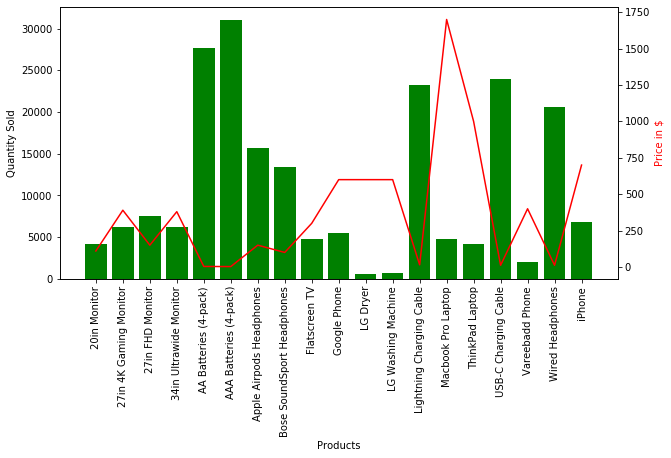

In [99]:
fig , ax1 = plt.subplots(figsize=(10,5))
ax2=ax1.twinx()
ax1.bar(prod_lst,quantity_ordered,color='g')
ax2.plot(prod_lst,price,color='r')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Sold')
ax2.set_ylabel('Price in $',color='r')
ax1.set_xticklabels(prod_lst,rotation='vertical')
plt.show()

### Proved: From the above fig it is clear that there is a correlation between the price and quantity sold of an item.